In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
from matplotlib.colors import LogNorm

In [7]:
git_users_profiles = pd.read_csv('mastodon_profiles_github.tsv', sep='\t')
git_users_profiles.columns = ['index', 'mastodon_name', 'displayname', 'twitterhandler', 'followers', 'following', 'created', 'bio', 'field']
git_users_profiles = git_users_profiles.dropna(subset='created',axis=0)

datetime_str = '%Y-%m-%d'

datetime_created = []
for str_date in git_users_profiles['created'].values:
    try:
        obj = datetime.datetime.strptime(str_date[:10], datetime_str)
    except:
        obj = datetime.datetime(2020, 1, 1)
    datetime_created.append(obj)
git_users_profiles['created_datetime'] = datetime_created


git_users_profiles.head()

,index,mastodon_name,displayname,twitterhandler,followers,following,created,bio,field,created_datetime
0,0.0,rheinze@assemblag.es,Robert Heinze,NaN,1041.0,245,2022-11-04 00:00:00+00:00,"<p>Historian, Deutsches Historisches Institut ...","{'name': 'Africanists on Mastodon list:', 'val...",2022-11-04
1,1.0,BrianJAP@mastodon.world,Brian J Peterson,NaN,232.0,239,2022-11-20 00:00:00+00:00,<p>Historian and professor at Union College in...,csv/scholars_African Studies.csv,2022-11-20
2,2.0,joelglasman@fediscience.org,Joël Glasman,NaN,864.0,1303,2022-11-04 00:00:00+00:00,"<p>historian. global history, humanitarianism,...","{'name': 'homepage', 'value': '<a href=""https:...",2022-11-04
3,3.0,brenton_peterson@sciences.social,Brenton Peterson,NaN,760.0,301,2022-11-01 00:00:00+00:00,<p>Social scientist; director - Sababi Institu...,"{'name': 'Google Scholar', 'value': '<a href=""...",2022-11-01
4,4.0,keremd@social.anoxinon.de,Kerem Duymus,NaN,179.0,789,2022-04-25 00:00:00+00:00,<p>History of Governance in the Sahara and Wes...,csv/scholars_African Studies.csv,2022-04-25


In [9]:
kuni_users_profiles = pd.read_csv('user_profiles_kuni_07-11-2023.tsv', sep='\t')
kuni_users_profiles.columns = ['index', 'username', 'instance', 'displayname', 'twitterhandler', 'followers', 'following', 'created', 'bio']

datetime_str = '%Y-%m-%d'

datetime_created = []
for str_date in kuni_users_profiles['created'].values:
    try:
        obj = datetime.datetime.strptime(str_date[:10], datetime_str)
    except:
        obj = datetime.datetime(2020, 1, 1)
    datetime_created.append(obj)
kuni_users_profiles['created_datetime'] = datetime_created


kuni_users_profiles.head()

,index,username,instance,displayname,twitterhandler,followers,following,created,bio,created_datetime
0,0,HelmutBuergmann,mstdn.science,Helmut Bürgmann,NaN,74,74,2022-11-05T00:00:00.000Z,<p>Aquatic Microbial Ecologist at Eawag - Surf...,2022-11-05
1,1,boshek,fosstodon.org,Sam Albers,NaN,59,45,2022-11-09T00:00:00.000Z,<p>Data Scientist with VoltronData<br />. Used...,2022-11-09
2,2,DenisDuboule,mas.to,Denis Duboule,NaN,342,66,2022-10-30T00:00:00.000Z,<p>Geneticist in transit. Collège de France/EP...,2022-10-30
3,3,paulgkeil,mastodon.world,PaulGKeil,NaN,12,10,2022-12-12T00:00:00.000Z,NaN,2022-12-12
4,4,rider_jon,zirk.us,Jon Hughes,"<span class=""h-card""><a href=""https://zirk.us/...",402,842,2022-11-18T00:00:00.000Z,<p>Academic (Reader in German/Cultural Studies...,2022-11-18


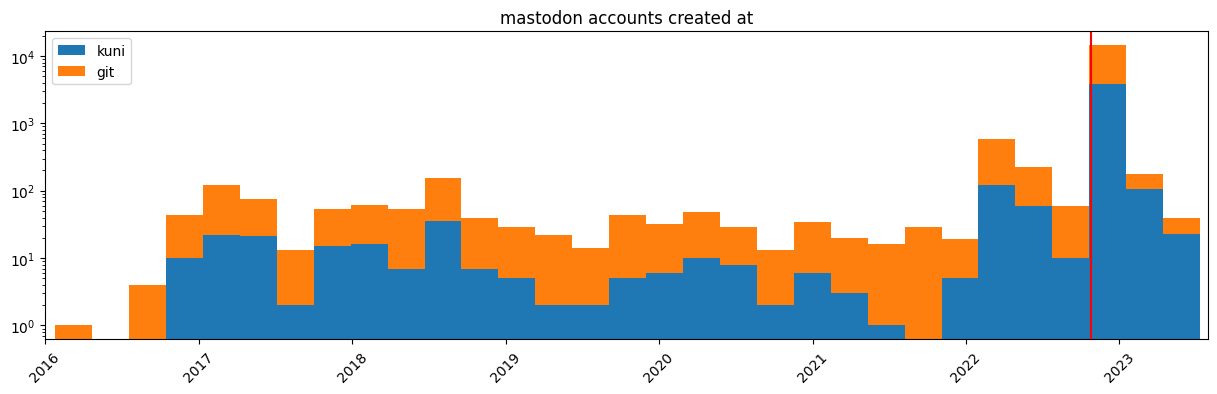

In [20]:
kuni_x = kuni_users_profiles['created_datetime']
git_x = git_users_profiles['created_datetime']

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist([kuni_x, git_x], bins=150, stacked=True, label=['kuni', 'git'])
plt.axvline(x=datetime.date(2022, 10, 26), color='red')

ax = plt.gca()
ax.xaxis_date()
# ax.xaxis.set_major_locator(MonthLocator())
plt.xlim(datetime.date(2016, 1, 1),datetime.date(2023, 7, 30))
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('mastodon accounts created at')
plt.legend()
plt.savefig('mastodon_accounts_created_at.png') #, tight_layout=True)